In [54]:
%load_ext Cython
import numpy as np
import matplotlib.pyplot as plt
#cythonを導入してるので動かなかったら消去してね

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [26]:
def culc_fdm(m):

    h=1/m
    x=[i*h for i in range(m)]

    x=np.array(x)
    b=np.sin(np.pi*x)*(h**2)*(np.pi)**2
    b[0]=0
    b[-1]=0

    diagonal_component=np.full(m,2)
    diagonal_component[0]=1
    diagonal_component[-1]=1

    diagonal_other=np.full(m-1,-1)
    diagonal_other[0]=0
    diagonal_other[-1]=0

    a=np.zeros((m,m))+np.diag(diagonal_component)+np.diag(diagonal_other,k=1)+np.diag(diagonal_other,k=-1) #係数行列

    return np.linalg.solve(a,b)


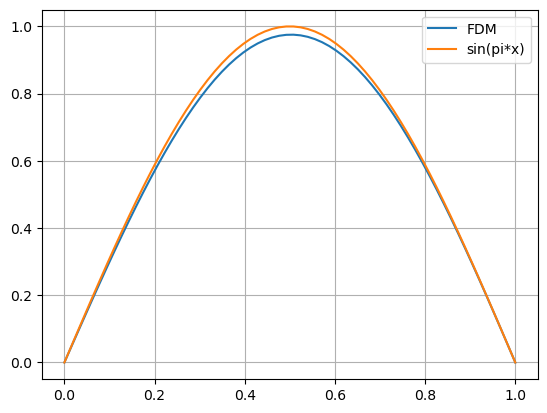

In [51]:
m=64
u=culc_fdm(m)

x=np.linspace(0,1,m)
plt.plot(x,u,label="FDM")
plt.plot(x,np.sin(np.pi*x),label="sin(pi*x)")
plt.legend()
plt.grid()
plt.show()